<a href="https://colab.research.google.com/github/ZenoZoldyck/Data_Creation/blob/main/DataCreation_DeConvolution_ont_hot_input.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

tf.__version__

'2.5.0'

In [2]:
(train_data, train_label), (test_data, test_label) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
train_data = np.array(train_data)

In [4]:
data = []
for i in range(60000) :
  a = tf.random.normal([100])
  data.append(a)

In [5]:
data_1 = np.array(data)
data_1.shape

(60000, 100)

In [6]:
train_data_norm = train_data / 255

In [7]:
train_data_norm_1 = tf.reshape(train_data_norm, shape=(60000, 28, 28, 1))

In [9]:
train_label[0]

5

In [10]:
train_label_1 = tf.one_hot(train_label, depth = 10)

In [11]:
train_label_1.shape

TensorShape([60000, 10])

In [32]:
model_1 = tf.keras.Sequential([
   tf.keras.layers.Dense(7*7*256, input_dim=10),
   tf.keras.layers.Reshape((7, 7, 256)),                          
   tf.keras.layers.Conv2DTranspose(128, (3, 3), use_bias=False, strides=2, padding="same"),
   tf.keras.layers.BatchNormalization(),
   tf.keras.layers.LeakyReLU(alpha=0.01),
   tf.keras.layers.Conv2DTranspose(64, (3, 3), use_bias=False, strides=1, padding="same"),
   tf.keras.layers.BatchNormalization(),
   tf.keras.layers.LeakyReLU(alpha=0.01),
   tf.keras.layers.Conv2DTranspose(1, (3, 3), use_bias=False, strides=2, padding="same", activation = "tanh")                          
])

model_1.compile(loss = tf.keras.losses.mse,
              optimizer = tf.keras.optimizers.Adam(lr = 0.0005),
              metrics=["accuracy"])
history = model_1.fit(train_label_1, train_data_norm_1, epochs=200) 


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/200
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0545 - accuracy: 0.7929
Epoch 2/200
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0537 - accuracy: 0.7936
Epoch 3/200
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0536 - accuracy: 0.7936
Epoch 4/200
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0536 - accuracy: 0.7936
Epoch 5/200
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0535 - accuracy: 0.7936
Epoch 6/200
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0535 - accuracy: 0.7937
Epoch 7/200
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0535 - accuracy: 0.7936
Epoch 8/200
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0535 - accuracy: 0.7937
Epoch 9/200
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0535 - accuracy: 0.7937
Epoch 10/200
1875/1875 [==============================] - 8s 4ms/step - l

KeyboardInterrupt: ignored

In [33]:
data_2 = []
for i in range(1000) :
  a = tf.random.normal([100])
  data_2.append(a)
data_2 = np.array(data_2)

In [34]:
y_pred = model_1.predict(tf.one_hot(test_label, depth = 10))

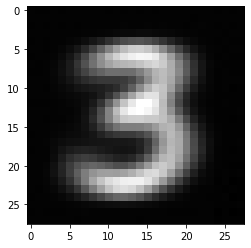

In [38]:
plt.imshow(tf.squeeze(y_pred[5000]), cmap = "gray")

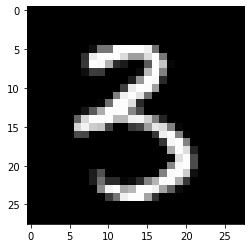

In [37]:
plt.imshow(test_data[5000], cmap="gray")

In [36]:
test_label[5000]

3

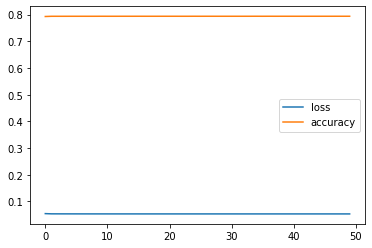

In [14]:
pd.DataFrame(history.history).plot()